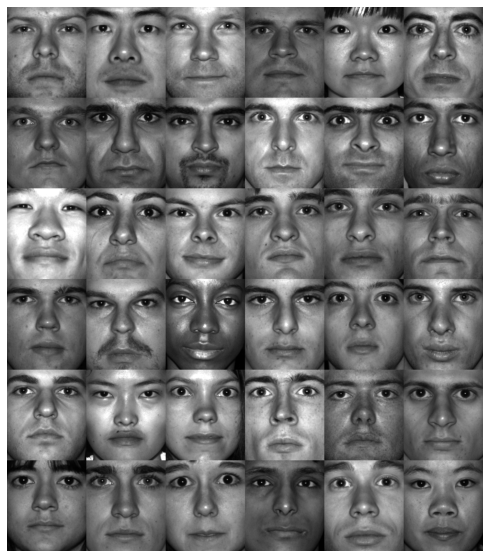

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('..','..','DATA','allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1
        
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

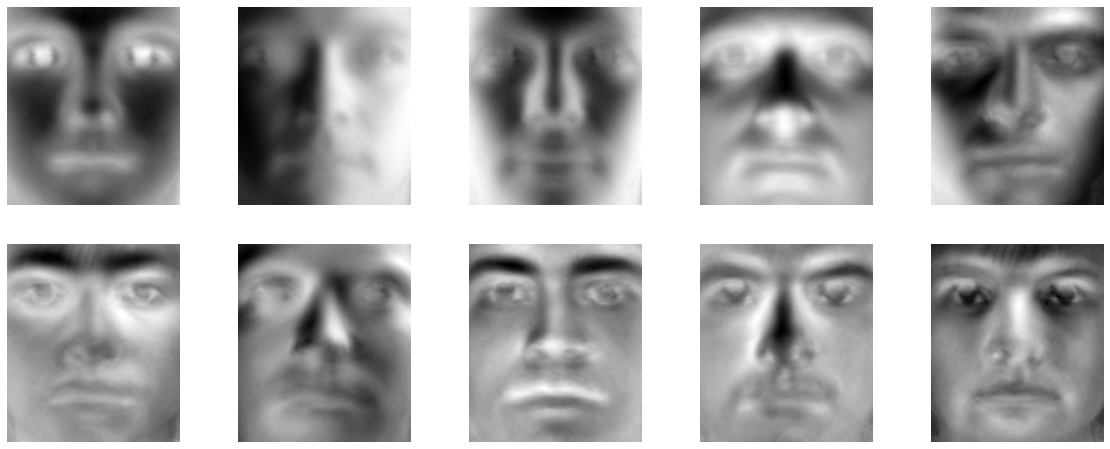

In [43]:
#手法1
X = faces[:,:np.sum(nfaces[:38])]
U, S, VT = np.linalg.svd(X,full_matrices=False)

plt.figure(figsize=(20,8))
row, col = 2, 5
num = 1
while num <= row * col:
    plt.subplot(row, col, num)
    plt.imshow(np.reshape(U[:,num-1],(m,n)).T)
    plt.axis('off')
    plt.set_cmap('gray')
    num += 1



In [44]:
#手法2
val, vec = np.linalg.eigh(X.T.astype(np.float64)@ X.astype(np.float64))
val = val[::-1]
vec = vec[:, ::-1]

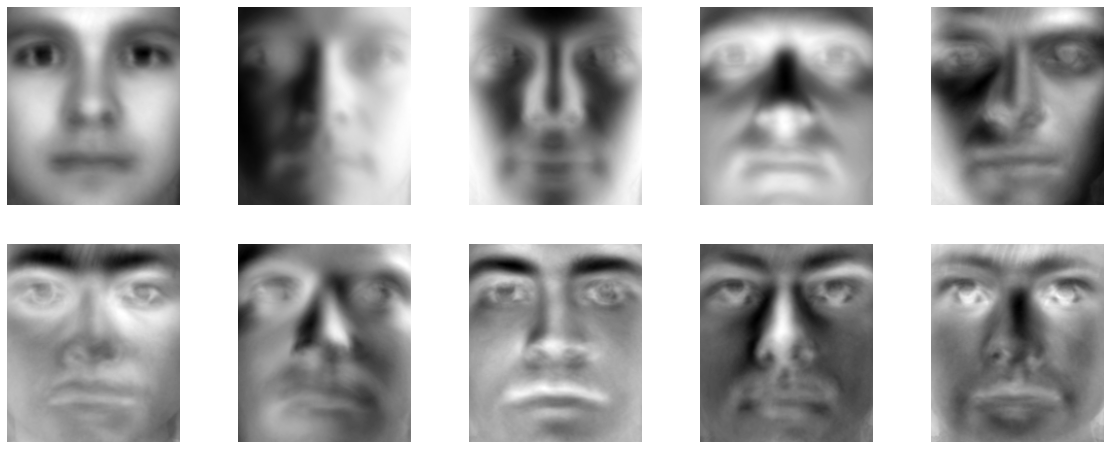

In [31]:
#U2 = X@vec@np.linalg.inv(val)
val_inv = 1/np.sqrt(val)
U2 = X@np.einsum("...,...",vec,val_inv)

plt.figure(figsize=(20, 8))
row, col = 2, 5
num = 1
while num <= row * col:
    plt.subplot(row, col, num)
    plt.imshow(np.reshape(U2[:,num-1],(m,n)).T)
    plt.axis('off')
    plt.set_cmap('gray')
    num += 1


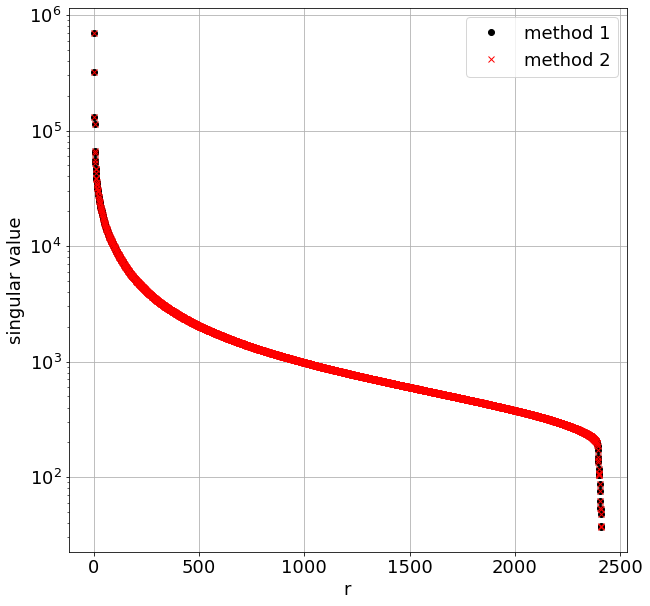

In [45]:
#特異値の比較
fig1= plt.figure(1)
plt.semilogy(S,'o', color='k', label='method 1')
plt.semilogy(np.sqrt(val),'x', color='r', label='method 2')
plt.xlabel('r')
plt.ylabel('singular value')
plt.grid()
plt.legend()
plt.show()